In [3]:
#pip install pandas scikit-learn
import zipfile
import pandas as pd
import os


In [5]:
import glob

# Read all CSV files and combine into one DataFrame
path = 'AQI_BY_COUNTY_25_YEARS'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_list = [pd.read_csv(f) for f in all_files]
df = pd.concat(df_list, ignore_index=True)

# Check column names
print(df.columns)

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')


In [8]:
# Group by year (aggregate by median AQI)
yearly_data = df.groupby("Year")["Median AQI"].median().reset_index()

# Prepare features and target
X = yearly_data[["Year"]]
y = yearly_data["Median AQI"]



In [9]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict next 5 years
import numpy as np

future_years = pd.DataFrame({"Year": np.arange(X["Year"].max() + 1, X["Year"].max() + 6)})
future_predictions = model.predict(future_years)

# Display results
for year, pred in zip(future_years["Year"], future_predictions):
    print(f"{year}: Predicted Median AQI = {pred:.2f}")

2025: Predicted Median AQI = 40.20
2026: Predicted Median AQI = 40.05
2027: Predicted Median AQI = 39.89
2028: Predicted Median AQI = 39.73
2029: Predicted Median AQI = 39.57


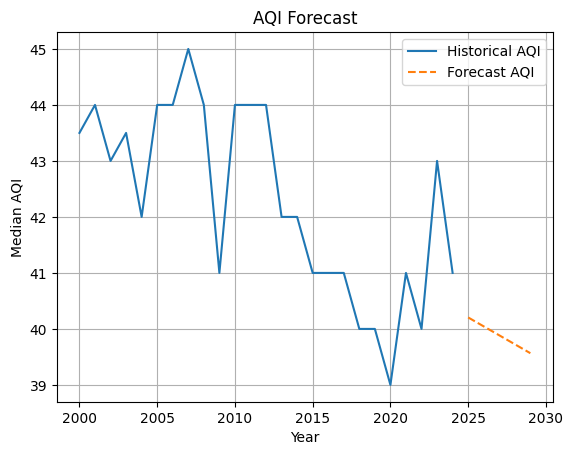

In [10]:
import matplotlib.pyplot as plt

plt.plot(X["Year"], y, label='Historical AQI')
plt.plot(future_years["Year"], future_predictions, label='Forecast AQI', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Median AQI')
plt.title('AQI Forecast')
plt.legend()
plt.grid(True)
plt.show()